In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from prettytable import PrettyTable

In [12]:
dfTweets = pd.read_csv('../data/preprocessedTweets.csv')
dfOpenAI = pd.read_csv('../data/openAI/openAIResults_combined.csv')

dfTweets.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
dfTweets.columns

Index(['Unnamed: 0.1', 'Date', 'TweetURL', 'User', 'Source', 'Location',
       'Tweet', 'Likes_Count', 'Retweet_Count', 'Quote_Count', 'Reply_Count',
       'compoundVader', 'compoundTextBlob', 'compoundRoBERTa', 'Tweet_NLTK',
       'Sentiment'],
      dtype='object')

In [14]:
dfMarket = pd.read_csv('../data/price_mining.csv')

#### Positives vs. Negatives Comparison

[Vader] Número de valores superiores ou iguais a zero: 798
[Vader] Número de valores inferiores a zero: 202
[RoBERTa] Número de valores superiores ou iguais a zero: 784
[RoBERTa] Número de valores inferiores a zero: 216
[ChatGPT] Número de valores superiores ou iguais a zero: 875
[ChatGPT] Número de valores inferiores a zero: 125


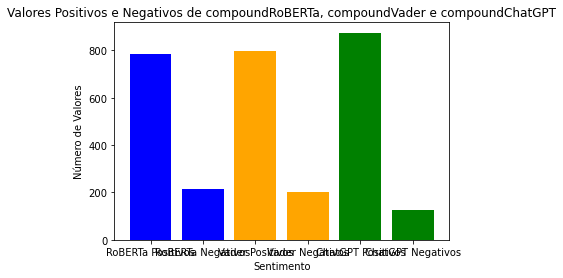

In [15]:
import matplotlib.pyplot as plt

roberta_positives = len(dfTweets[dfTweets['compoundRoBERTa'] >= 0])
roberta_negatives = len(dfTweets[dfTweets['compoundRoBERTa'] < 0])

vader_positives = len(dfTweets[dfTweets['compoundVader'] >= 0])
vader_negatives = len(dfTweets[dfTweets['compoundVader'] < 0])

chatgpt_positives = len(dfOpenAI[dfOpenAI['compoundChatGPT'] >= 0])
chatgpt_negatives = len(dfOpenAI[dfOpenAI['compoundChatGPT'] < 0])

print("[Vader] Número de valores superiores ou iguais a zero:", vader_positives)
print("[Vader] Número de valores inferiores a zero:", vader_negatives)

print("[RoBERTa] Número de valores superiores ou iguais a zero:", roberta_positives)
print("[RoBERTa] Número de valores inferiores a zero:", roberta_negatives)

print("[ChatGPT] Número de valores superiores ou iguais a zero:", chatgpt_positives)
print("[ChatGPT] Número de valores inferiores a zero:", chatgpt_negatives)

labels = ['RoBERTa Positivos', 'RoBERTa Negativos', 'Vader Positivos', 'Vader Negativos', 'ChatGPT Positivos', 'ChatGPT Negativos']
values = [roberta_positives, roberta_negatives, vader_positives, vader_negatives, chatgpt_positives, chatgpt_negatives]
colors = ['blue', 'blue', 'orange', 'orange', 'green', 'green']

plt.bar(labels, values, color=colors)
plt.xlabel('Sentimento')
plt.ylabel('Número de Valores')
plt.title('Valores Positivos e Negativos de compoundRoBERTa, compoundVader e compoundChatGPT')

plt.show()


#### Bullish Ratio analysis

Tweet’s bullish ratio is known as the number of positive tweets over a number of negative tweets.

A bullish ratio greater than one indicates audiences’ belief that the cryptocurrency’s return will increase. Otherwise, a value lower than one shows greater negativity towards the cryptocurrency and the market will be pulled back in near future

In [16]:
bullishRatioVader = vader_positives / vader_negatives
print("[Vader] Razão de tweets positivos para negativos: ", bullishRatioVader)

bullishRatioRoberta = roberta_positives / roberta_negatives
print("[roBERTa] Razão de tweets positivos para negativos: ", bullishRatioRoberta)

bullishRatioChatGPT = chatgpt_positives / chatgpt_negatives
print("[ChatGPT] Razão de tweets positivos para negativos: ", bullishRatioChatGPT)

[Vader] Razão de tweets positivos para negativos:  3.9504950495049505
[roBERTa] Razão de tweets positivos para negativos:  3.6296296296296298
[ChatGPT] Razão de tweets positivos para negativos:  7.0


#### Cast tweets date to datetime type

In [17]:
dfTweets["Date"] = pd.to_datetime(dfTweets["Date"])

#### Check RT and Likes Count

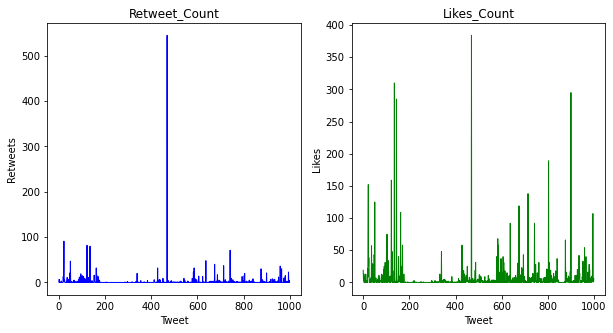

In [18]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(dfTweets["Retweet_Count"], color="blue", linewidth=1)
plt.title("Retweet_Count")
plt.xlabel("Tweet")
plt.ylabel("Retweets")

plt.subplot(1, 2, 2)
plt.plot(dfTweets["Likes_Count"], color="green", linewidth=1)
plt.title("Likes_Count")
plt.xlabel("Tweet")
plt.ylabel("Likes")

plt.show()


#### Compound Variation

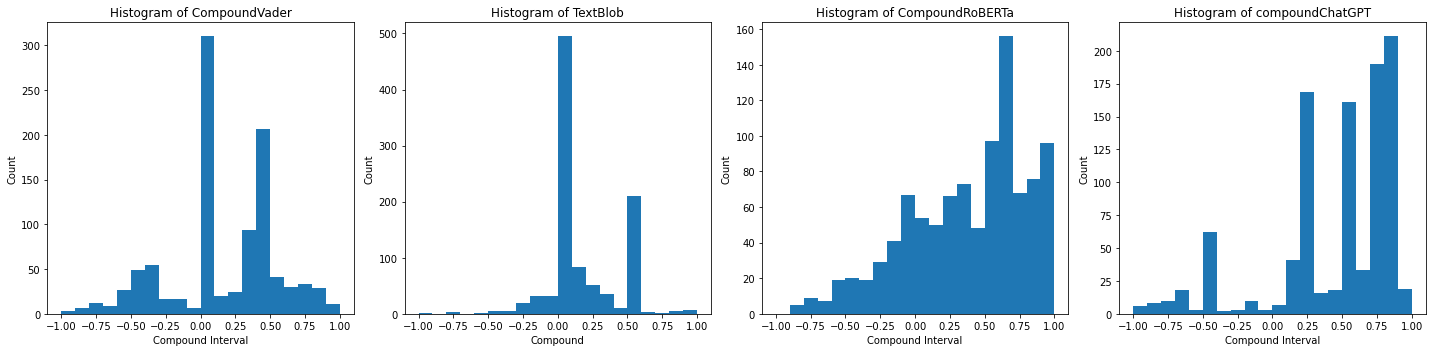

In [19]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(-1, 1.1, 0.1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.hist(dfTweets['compoundVader'], bins=bins)
ax1.set_xlabel('Compound Interval')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of CompoundVader')

dfTweets['polarity'] = dfTweets['compoundTextBlob'].apply(lambda x: float(re.search(r'polarity=(-?\d+\.?\d*)', x).group(1)))
ax2.hist(dfTweets['polarity'], bins=20)
ax2.set_xlabel('Compound')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of TextBlob')

ax3.hist(dfTweets['compoundRoBERTa'], bins=bins)
ax3.set_xlabel('Compound Interval')
ax3.set_ylabel('Count')
ax3.set_title('Histogram of CompoundRoBERTa')

ax4.hist(dfOpenAI['compoundChatGPT'], bins=bins)
ax4.set_xlabel('Compound Interval')
ax4.set_ylabel('Count')
ax4.set_title('Histogram of compoundChatGPT')

plt.tight_layout()

plt.show()


#### Check variation between roBERTa, OpenAI and Vader compound

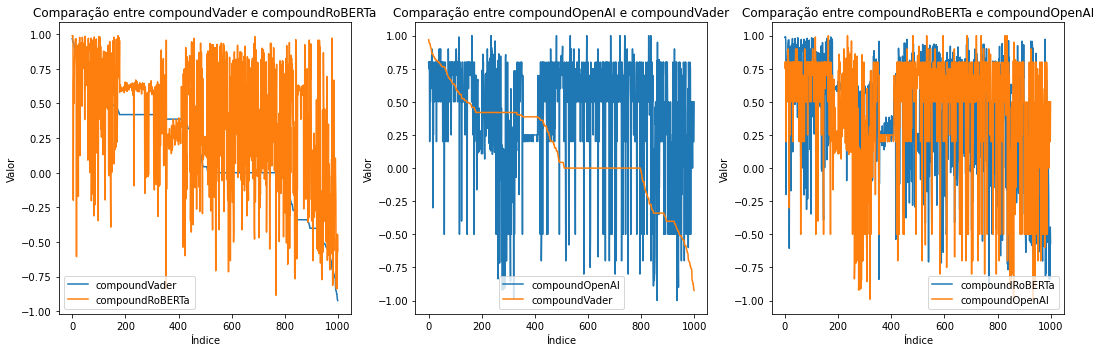

In [20]:
import matplotlib.pyplot as plt

compound_vader = dfTweets['compoundVader']
compound_roberta = dfTweets['compoundRoBERTa']
compound_openai = dfOpenAI['compoundChatGPT']

indices = range(len(dfTweets))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(indices, compound_vader, label='compoundVader')
ax1.plot(indices, compound_roberta, label='compoundRoBERTa')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')
ax1.set_title('Comparação entre compoundVader e compoundRoBERTa')
ax1.legend()

ax2.plot(indices, compound_openai, label='compoundOpenAI')
ax2.plot(indices, compound_vader, label='compoundVader')
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')
ax2.set_title('Comparação entre compoundOpenAI e compoundVader')
ax2.legend()

ax3.plot(indices, compound_roberta, label='compoundRoBERTa')
ax3.plot(indices, compound_openai, label='compoundOpenAI')
ax3.set_xlabel('Índice')
ax3.set_ylabel('Valor')
ax3.set_title('Comparação entre compoundRoBERTa e compoundOpenAI')
ax3.legend()

plt.tight_layout()

plt.show()


#### Check compound variance over time

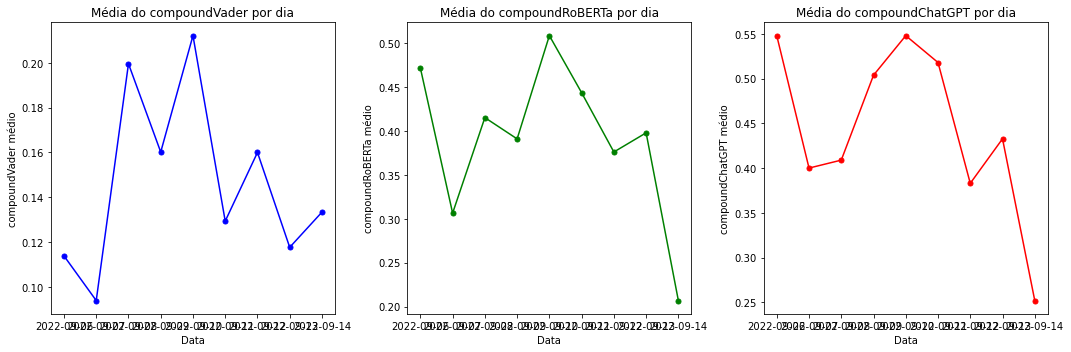

In [21]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date']).dt.date

df_daily_vader = dfTweets.groupby('Date')['compoundVader'].mean().reset_index()
df_daily_roberta = dfTweets.groupby('Date')['compoundRoBERTa'].mean().reset_index()
dfOpenAI['Date'] = pd.to_datetime(dfOpenAI['Date']).dt.date
df_daily_chatgpt = dfOpenAI.groupby('Date')['compoundChatGPT'].mean().reset_index()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(df_daily_vader['Date'], df_daily_vader['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Média do compoundVader por dia')

ax2.plot(df_daily_roberta['Date'], df_daily_roberta['compoundRoBERTa'], color='green', marker='o', markersize=5)
ax2.set_xlabel('Data')
ax2.set_ylabel('compoundRoBERTa médio')
ax2.set_title('Média do compoundRoBERTa por dia')

ax3.plot(df_daily_chatgpt['Date'], df_daily_chatgpt['compoundChatGPT'], color='red', marker='o', markersize=5)
ax3.set_xlabel('Data')
ax3.set_ylabel('compoundChatGPT médio')
ax3.set_title('Média do compoundChatGPT por dia')

plt.tight_layout()
plt.show()


#### Check price variance over time

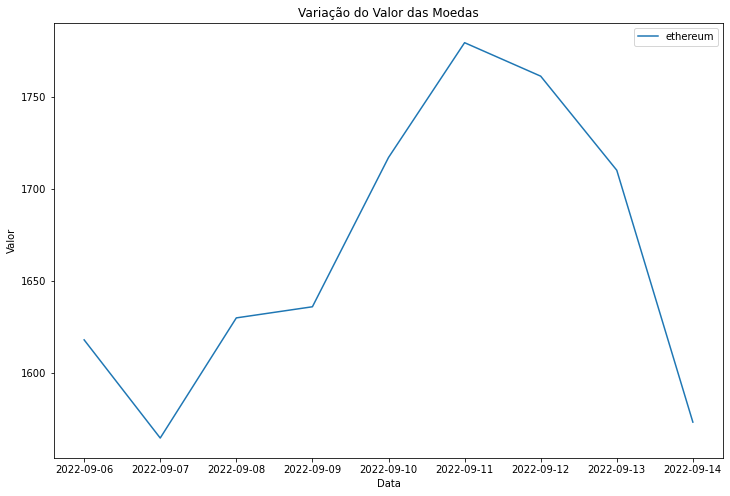

In [22]:
dfMarket = dfMarket[(dfMarket['datetime'] >= '2022-09-06') & (dfMarket['datetime'] <= '2022-09-14')]


df_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(12, 8))

for currency in df_daily['currency_name'].unique():
    df_currency = df_daily[df_daily['currency_name'] == currency]
    ax.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_title('Variação do Valor das Moedas')
ax.legend()
plt.show()


#### Comparison between Tweet Sentiment and Cryptocurrency Value

- compoundVader

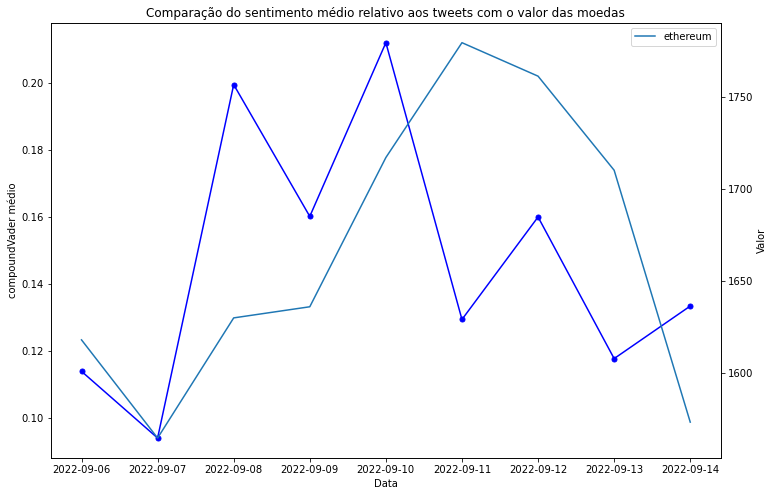

In [23]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])



df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()



fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


- compoundRoBERTa

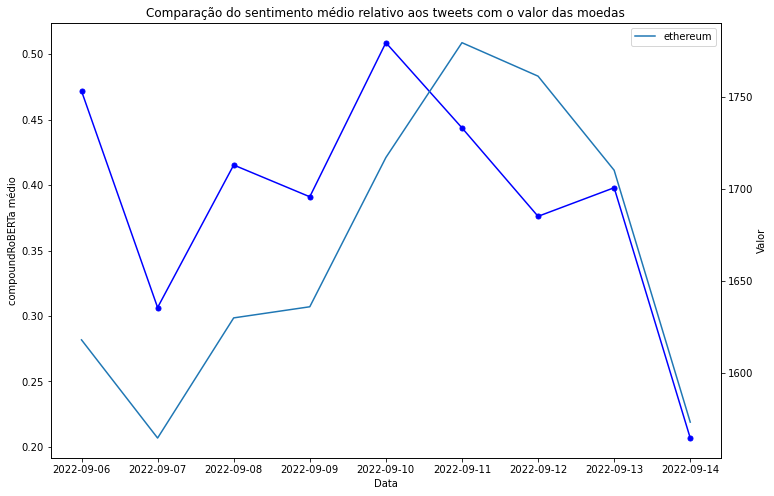

In [24]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])



df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()



fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundRoBERTa'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundRoBERTa médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


- compoundChatGPT

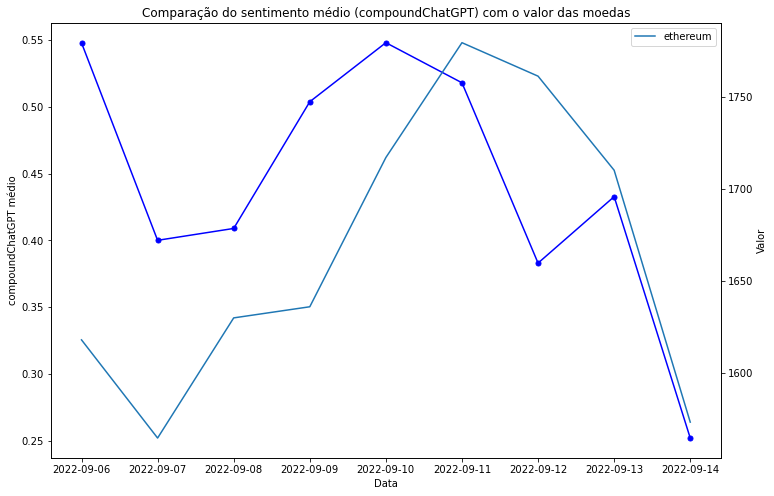

In [25]:
dfOpenAI['Date'] = pd.to_datetime(dfOpenAI['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_openai_daily = dfOpenAI.groupby(dfOpenAI['Date'].dt.date)['compoundChatGPT'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_openai_daily['Date'], df_openai_daily['compoundChatGPT'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundChatGPT médio')
ax1.set_title('Comparação do sentimento médio (compoundChatGPT) com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


##### Now applying a 1 day shift to crypto price

- compoundVader

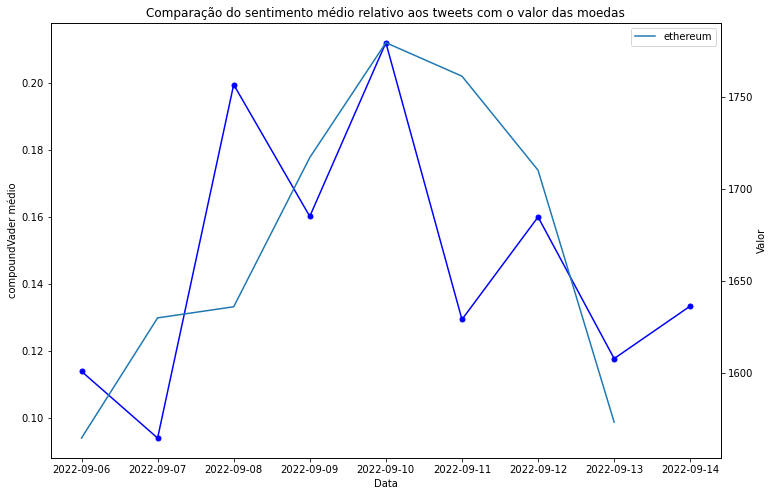

In [62]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


- compoundRoBERTa

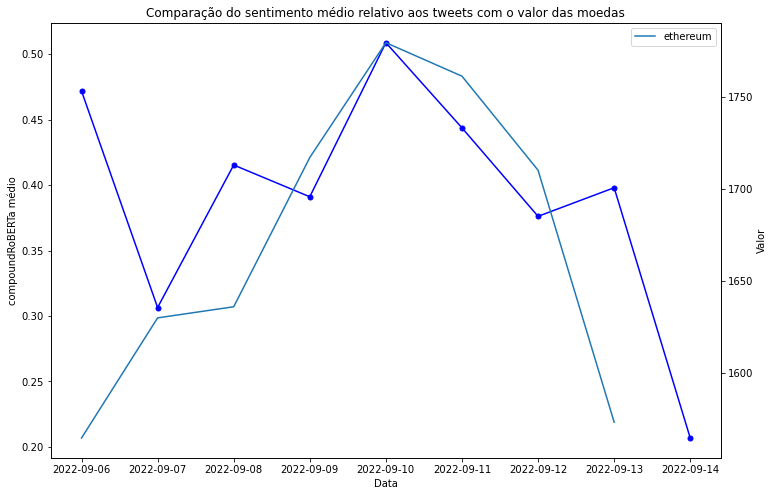

In [27]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundRoBERTa'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundRoBERTa médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


- compoundChatGPT

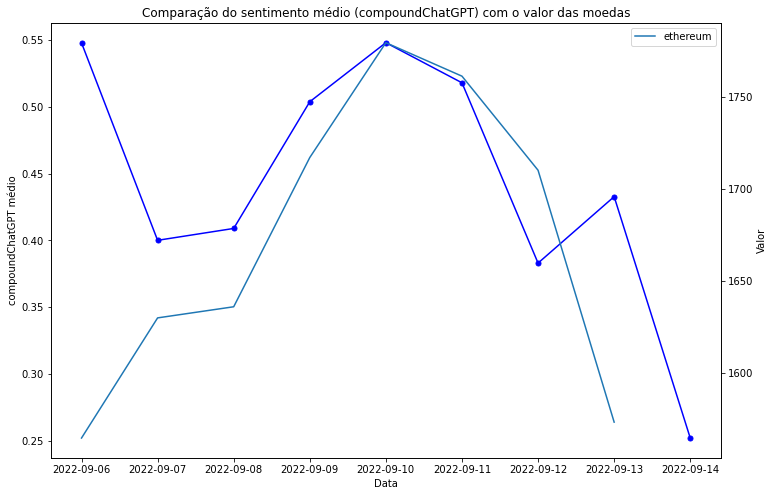

In [28]:
dfOpenAI['Date'] = pd.to_datetime(dfOpenAI['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_openai_daily = dfOpenAI.groupby(dfOpenAI['Date'].dt.date)['compoundChatGPT'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1) 

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_openai_daily['Date'], df_openai_daily['compoundChatGPT'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundChatGPT médio')
ax1.set_title('Comparação do sentimento médio (compoundChatGPT) com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


##### Now with a 2 days shift in crypto price

- compoundVader

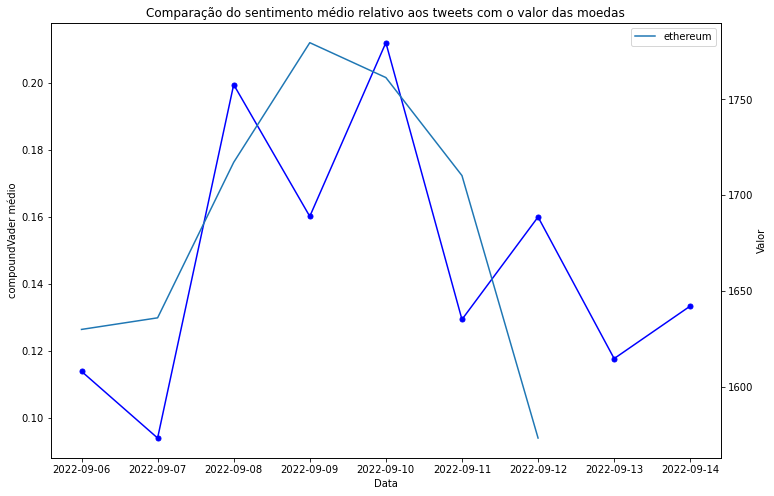

In [29]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-2)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()

- compoundRoBERTa

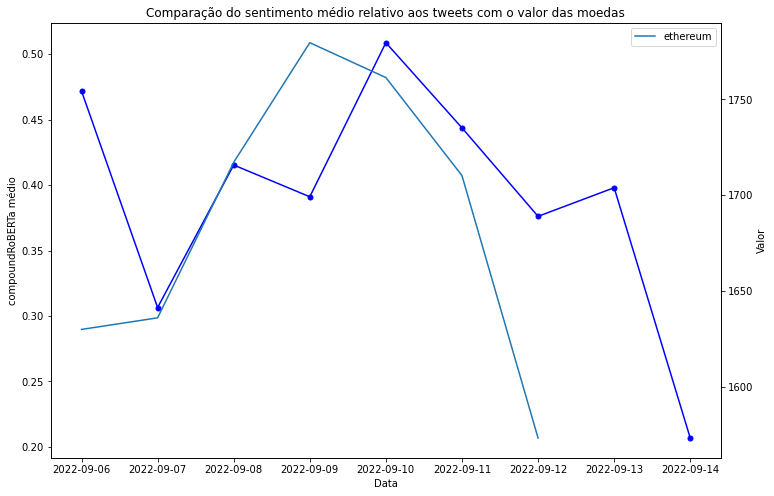

In [30]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-2)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundRoBERTa'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundRoBERTa médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()

- compoundChatGPT

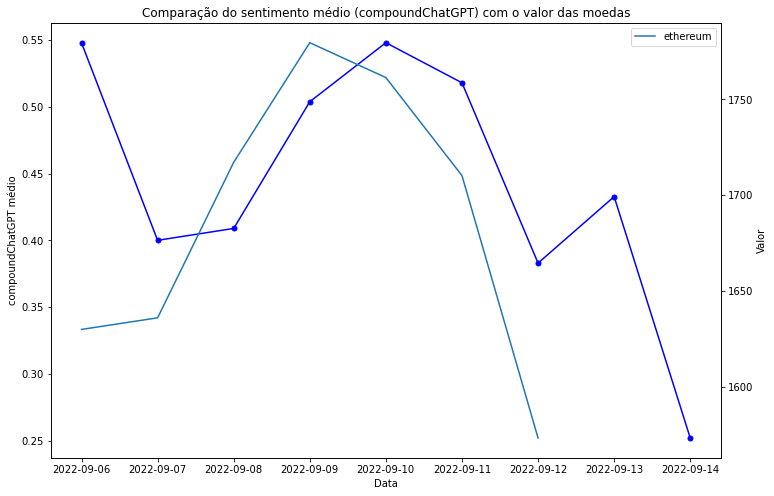

In [31]:
dfOpenAI['Date'] = pd.to_datetime(dfOpenAI['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_openai_daily = dfOpenAI.groupby(dfOpenAI['Date'].dt.date)['compoundChatGPT'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-2) 

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_openai_daily['Date'], df_openai_daily['compoundChatGPT'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundChatGPT médio')
ax1.set_title('Comparação do sentimento médio (compoundChatGPT) com o valor das moedas')

ax2 = ax1.twinx()

for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


#### Calculate correlation between both

- compoundVader

In [32]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

corr = df_merged['Value'].corr(df_merged['compoundVader'])

print('Correlação: {:.2f}'.format(corr))

Correlação: 0.29


- compoundRoBERTa

In [33]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

corr = df_merged['Value'].corr(df_merged['compoundRoBERTa'])

print('Correlação: {:.2f}'.format(corr))

Correlação: 0.56


- compoundChatGPT

In [34]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfOpenAI_daily = dfOpenAI.groupby('Date').agg({'compoundChatGPT': 'mean'}).reset_index()

df_merged = pd.merge(dfMarket_daily, dfOpenAI_daily, on='Date')

corr = df_merged['Value'].corr(df_merged['compoundChatGPT'])

print('Correlação: {:.2f}'.format(corr))

Correlação: 0.40


#### Calculate correlation with a 1 day shift

- compoundVader

In [35]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-1)

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

corr = df_merged['Value_shifted'].corr(df_merged['compoundVader'])

print('Correlação com atraso de 1 dia: {:.2f}'.format(corr))


Correlação com atraso de 1 dia: 0.55


- compoundRoBERTa

In [36]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-1)

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

corr = df_merged['Value_shifted'].corr(df_merged['compoundRoBERTa'])

print('Correlação com atraso de 1 dia: {:.2f}'.format(corr))


Correlação com atraso de 1 dia: 0.29


- compoundChatGPT

In [37]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-1)

dfOpenAI_daily = dfOpenAI.groupby('Date').agg({'compoundChatGPT': 'mean'}).reset_index()

df_merged = pd.merge(dfMarket_daily, dfOpenAI_daily, on='Date')

corr = df_merged['Value_shifted'].corr(df_merged['compoundChatGPT'])

print('Correlação com atraso de 1 dia: {:.2f}'.format(corr))


Correlação com atraso de 1 dia: 0.29


#### Correlation with 2 days shift

- compoundVader

In [38]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-2)

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

corr = df_merged['Value_shifted'].corr(df_merged['compoundVader'])

print('Correlação com atraso de 2 dias: {:.2f}'.format(corr))

Correlação com atraso de 2 dias: 0.53


- compoundRoBERTa

In [39]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-2)

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

corr = df_merged['Value_shifted'].corr(df_merged['compoundRoBERTa'])

print('Correlação com atraso de 2 dias: {:.2f}'.format(corr))

Correlação com atraso de 2 dias: 0.40


- compoundChatGPT

In [40]:
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfMarket_daily['Value_shifted'] = dfMarket_daily['Value'].shift(-2)

dfOpenAI_daily = dfOpenAI.groupby('Date').agg({'compoundChatGPT': 'mean'}).reset_index()

df_merged = pd.merge(dfMarket_daily, dfOpenAI_daily, on='Date')

corr = df_merged['Value_shifted'].corr(df_merged['compoundChatGPT'])

print('Correlação com atraso de 1 dia: {:.2f}'.format(corr))


Correlação com atraso de 1 dia: 0.52


##### Now, it will be applied a Linear Regression to be able to verify if the obtained correlation value is significant

- compoundVader

In [41]:
import statsmodels.api as sm

dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

X = sm.add_constant(df_merged['compoundVader'])
model = sm.OLS(df_merged['Value'], X)
results = model.fit()
y_pred = results.predict(X)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.6298
Date:                Thu, 15 Jun 2023   Prob (F-statistic):              0.453
Time:                        18:56:11   Log-Likelihood:                -51.180
No. Observations:                   9   AIC:                             106.4
Df Residuals:                       7   BIC:                             106.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1581.6892    109.011     14.509

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Using y predicted by LinearRegression to compare with real values

In [42]:
table = PrettyTable(["Real", "Predicted", "Error (%)"])

total_error = 0
for i in range(len(dfMarket_daily["Value"])):
    real_value = dfMarket_daily["Value"][i]
    predicted_value = y_pred[i]
    error_percent = abs(predicted_value - real_value) / real_value * 100
    table.add_row([real_value, predicted_value, f"{error_percent:.2f}%"])
    total_error += error_percent

avg_error = total_error / len(dfMarket_daily["Value"])

print(table)
print(f"Média do erro: {avg_error:.2f}%")


+--------------------+--------------------+-----------+
|        Real        |     Predicted      | Error (%) |
+--------------------+--------------------+-----------+
| 1617.9354554854335 | 1646.7531817063293 |   1.78%   |
| 1564.5589540302462 | 1635.3555964299167 |   4.53%   |
| 1629.8832311636493 | 1695.7507569263455 |   4.04%   |
| 1635.9321760130483 | 1673.2301776693762 |   2.28%   |
| 1717.0769569840472 | 1702.916282543173  |   0.82%   |
| 1779.5190288833046 | 1655.6154371974646 |   6.96%   |
| 1761.317355880691  | 1673.1298917706722 |   5.01%   |
| 1710.1642908515214 | 1648.9324386929802 |   3.58%   |
| 1573.205213695171  | 1657.9089000508545 |   5.38%   |
+--------------------+--------------------+-----------+
Média do erro: 3.82%


- compoundRoBERTa

In [43]:
import statsmodels.api as sm

dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundRoBERTa': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

X = sm.add_constant(df_merged['compoundRoBERTa'])
model = sm.OLS(df_merged['Value'], X)
results = model.fit()
y_pred = results.predict(X)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.155
Date:                Thu, 15 Jun 2023   Prob (F-statistic):              0.119
Time:                        18:56:12   Log-Likelihood:                -49.893
No. Observations:                   9   AIC:                             103.8
Df Residuals:                       7   BIC:                             104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1474.6169    109.978     

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Using y predicted by LinearRegression to compare with real values

In [44]:
table = PrettyTable(["Real", "Predicted", "Error (%)"])

total_error = 0
for i in range(len(dfMarket_daily["Value"])):
    real_value = dfMarket_daily["Value"][i]
    predicted_value = y_pred[i]
    error_percent = abs(predicted_value - real_value) / real_value * 100
    table.add_row([real_value, predicted_value, f"{error_percent:.2f}%"])
    total_error += error_percent

avg_error = total_error / len(dfMarket_daily["Value"])

print(table)
print(f"Média do erro: {avg_error:.2f}%")


+--------------------+--------------------+-----------+
|        Real        |     Predicted      | Error (%) |
+--------------------+--------------------+-----------+
| 1617.9354554854335 | 1705.0276318967715 |   5.38%   |
| 1564.5589540302462 | 1624.2941551477675 |   3.82%   |
| 1629.8832311636493 | 1677.4351286400838 |   2.92%   |
| 1635.9321760130483 | 1665.5935657580956 |   1.81%   |
| 1717.0769569840472 | 1723.0473530684103 |   0.35%   |
| 1779.5190288833046 | 1691.2955502278091 |   4.96%   |
| 1761.317355880691  | 1658.2990185300205 |   5.85%   |
| 1710.1642908515214 | 1668.9663918224835 |   2.41%   |
| 1573.205213695171  | 1575.633867895665  |   0.15%   |
+--------------------+--------------------+-----------+
Média do erro: 3.07%


- compoundChatGPT

In [45]:
import statsmodels.api as sm

dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

dfOpenAI_daily = dfOpenAI.groupby('Date').agg({'compoundChatGPT': 'mean'}).reset_index()

df_merged = pd.merge(dfMarket_daily, dfOpenAI_daily, on='Date')

X = sm.add_constant(df_merged['compoundChatGPT'])
model = sm.OLS(df_merged['Value'], X)
results = model.fit()
y_pred = results.predict(X)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.300
Date:                Thu, 15 Jun 2023   Prob (F-statistic):              0.292
Time:                        18:56:12   Log-Likelihood:                -50.801
No. Observations:                   9   AIC:                             105.6
Df Residuals:                       7   BIC:                             106.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1521.7377    128.718     

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [46]:
from prettytable import PrettyTable

table = PrettyTable(["Real", "Predicted", "Error (%)"])

total_error = 0
for i in range(len(df_merged["Value"])):
    real_value = df_merged["Value"][i]
    predicted_value = y_pred[i]
    error_percent = abs(predicted_value - real_value) / real_value * 100
    table.add_row([real_value, predicted_value, f"{error_percent:.2f}%"])
    total_error += error_percent

avg_error = total_error / len(df_merged["Value"])

print(table)
print(f"Média do erro: {avg_error:.2f}%")

+--------------------+--------------------+-----------+
|        Real        |     Predicted      | Error (%) |
+--------------------+--------------------+-----------+
| 1617.9354554854335 | 1699.2299799553884 |   5.02%   |
| 1564.5589540302462 | 1651.3259468285519 |   5.55%   |
| 1629.8832311636493 | 1654.2045298954122 |   1.49%   |
| 1635.9321760130483 | 1684.9416680461345 |   3.00%   |
| 1717.0769569840472 | 1699.2654022669926 |   1.04%   |
| 1779.5190288833046 | 1689.5368010712493 |   5.06%   |
| 1761.317355880691  | 1645.803368234546  |   6.56%   |
| 1710.1642908515214 | 1661.9201534991678 |   2.82%   |
| 1573.205213695171  | 1603.3648131896814 |   1.92%   |
+--------------------+--------------------+-----------+
Média do erro: 3.61%


#### Calculate cross correlation

Crosscorrelation is a metric that measures the similarity between two time series. 

In the context of their work, calculating the crosscorrelation between the compoundVader mean of tweets and the value of cryptocurrencies can provide insights into the relationship between sentiments expressed in tweets and cryptocurrency market behavior. That way, it can be observed some temporal correlations/relationships aswell as measure if there is any time delay between the actual coin value and the predictions.

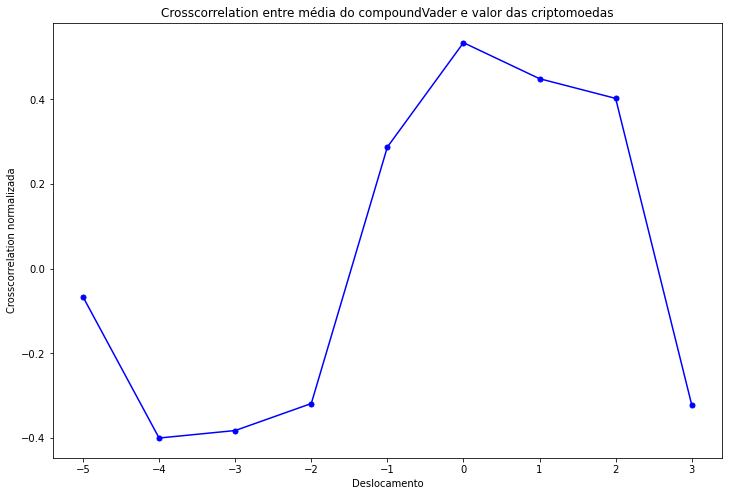

In [47]:
import numpy as np

tweets_daily = dfTweets.groupby('Date')['compoundVader'].mean().values

crypto_daily = dfMarket.groupby('Date')['Value'].mean().values

crosscorr = np.correlate(crypto_daily - crypto_daily.mean(), tweets_daily - tweets_daily.mean(),  mode='same') / np.sqrt(np.sum((tweets_daily - tweets_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr, color='blue', marker='o', markersize=5)

ax.set_xlabel('Deslocamento')
ax.set_ylabel('Crosscorrelation normalizada')
ax.set_title('Crosscorrelation entre média do compoundVader e valor das criptomoedas')
plt.show()


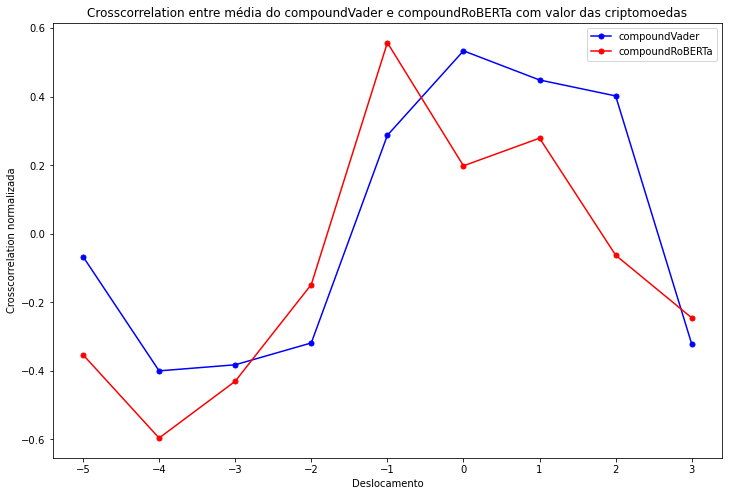

In [48]:
import numpy as np
import matplotlib.pyplot as plt

tweets_daily = dfTweets.groupby('Date')['compoundVader'].mean().values
roberta_daily = dfTweets.groupby('Date')['compoundRoBERTa'].mean().values
crypto_daily = dfMarket.groupby('Date')['Value'].mean().values

crosscorr_vader = np.correlate(crypto_daily - crypto_daily.mean(), tweets_daily - tweets_daily.mean(), mode='same') / np.sqrt(np.sum((tweets_daily - tweets_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))
crosscorr_roberta = np.correlate(crypto_daily - crypto_daily.mean(), roberta_daily - roberta_daily.mean(), mode='same') / np.sqrt(np.sum((roberta_daily - roberta_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr_vader, color='blue', marker='o', markersize=5, label='compoundVader')
ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr_roberta, color='red', marker='o', markersize=5, label='compoundRoBERTa')

ax.set_xlabel('Deslocamento')
ax.set_ylabel('Crosscorrelation normalizada')
ax.set_title('Crosscorrelation entre média do compoundVader e compoundRoBERTa com valor das criptomoedas')
ax.legend()

plt.show()


#### Granger Causality Tests

Once the correlation does not imply causality, causality tests are applied next

Granger Causality test is a statistical test that is used to determine if a given time series and it’s lags is helpful in explaining/forecasting the value of another series.

That is, the Granger Causality can be used to check if a given series is a leading indicator of a series we want to forecast/predict.

This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

In [49]:
# dfTweets['compoundVader'].isnull().values.any()

# print(np.isinf(dfTweets['compoundVader']).any()) 

- compoundVader

In [59]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

dfMarket_daily = dfMarket[(dfMarket['Date'] >= '2022-09-06') & (dfMarket['Date'] <= '2022-09-14')]
dfMarket_daily = dfMarket_daily.groupby('Date')['Value'].mean().reset_index()

x = np.array(dfMarket_daily["Value"])
y = np.array(tweets_daily["compoundVader"])

data = pd.DataFrame({'x': x, 'y': y})
results = grangercausalitytests(data, maxlag=2)
lag1_results = results[1]
# print("Granger Causality (lag 1) - Test statistic:", lag1_results[0]['ssr_ftest'][0])
# print("Granger Causality (lag 1) - p-value:", lag1_results[0]['ssr_ftest'][1])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6989  , p=0.2492  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=2.7183  , p=0.0992  , df=1
likelihood ratio test: chi2=2.3401  , p=0.1261  , df=1
parameter F test:         F=1.6989  , p=0.2492  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2846  , p=0.7784  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=1.9923  , p=0.3693  , df=2
likelihood ratio test: chi2=1.7532  , p=0.4162  , df=2
parameter F test:         F=0.2846  , p=0.7784  , df_denom=2, df_num=2


- compoundRoBERTa

In [55]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundRoBERTa'].mean().reset_index()

dfMarket_daily = dfMarket[(dfMarket['Date'] >= '2022-09-06') & (dfMarket['Date'] <= '2022-09-14')]
dfMarket_daily = dfMarket_daily.groupby('Date')['Value'].mean().reset_index()

x = np.array(dfMarket_daily["Value"])
y = np.array(tweets_daily["compoundRoBERTa"])

data = pd.DataFrame({'x': x, 'y': y})
results = grangercausalitytests(data, maxlag=2)
lag1_results = results[1]
# print("Granger Causality (lag 1) - Test statistic:", lag1_results[0]['ssr_ftest'][0])
# print("Granger Causality (lag 1) - p-value:", lag1_results[0]['ssr_ftest'][1])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0443  , p=0.8417  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.0708  , p=0.7901  , df=1
likelihood ratio test: chi2=0.0705  , p=0.7906  , df=1
parameter F test:         F=0.0443  , p=0.8417  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2957  , p=0.4356  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=9.0698  , p=0.0107  , df=2
likelihood ratio test: chi2=5.8172  , p=0.0546  , df=2
parameter F test:         F=1.2957  , p=0.4356  , df_denom=2, df_num=2


- compoundChatGPT

In [58]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfOpenAI_daily = dfOpenAI.groupby(dfOpenAI['Date'].dt.date)['compoundChatGPT'].mean().reset_index()

dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

data = pd.DataFrame({'x': dfMarket_daily['Value'], 'y': dfOpenAI_daily['compoundChatGPT']})

results = grangercausalitytests(data, maxlag=2)
lag1_results = results[1]



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3878  , p=0.5607  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.6206  , p=0.4308  , df=1
likelihood ratio test: chi2=0.5977  , p=0.4395  , df=1
parameter F test:         F=0.3878  , p=0.5607  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5421  , p=0.3934  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=10.7947 , p=0.0045  , df=2
likelihood ratio test: chi2=6.5309  , p=0.0382  , df=2
parameter F test:         F=1.5421  , p=0.3934  , df_denom=2, df_num=2


----
#### Dates in the dataset

In [53]:
df1 = pd.read_csv('../data/bullishTweets.csv')
df1['Date'] = pd.to_datetime(dfTweets['Date']).dt.date
df1["Date"].unique()

array([datetime.date(2022, 9, 9), datetime.date(2022, 9, 11),
       datetime.date(2022, 9, 13), datetime.date(2022, 9, 12),
       datetime.date(2022, 9, 14), datetime.date(2022, 9, 10),
       datetime.date(2022, 9, 7), datetime.date(2022, 9, 8),
       datetime.date(2022, 9, 6)], dtype=object)